## Time Series Analysis For Simulated and Real CEO Salaries. 

### Genaro Basulto 
### April, 2022

In [1]:
library(ggplot2)
library(TTR)
library(tidyverse) 
library(dplyr)
library(stargazer)
library(sandwich)
library(plm) 

Warning message:
"package 'TTR' was built under R version 4.0.5"
-- Attaching packages --------------------------------------- tidyverse 1.3.0 --

v tibble  3.0.5     v dplyr   1.0.4
v tidyr   1.1.2     v stringr 1.4.0
v readr   1.4.0     v forcats 0.5.1
v purrr   0.3.4     

-- Conflicts ------------------------------------------ tidyverse_conflicts() --
x dplyr::filter() masks stats::filter()
x dplyr::lag()    masks stats::lag()


Please cite as: 


 Hlavac, Marek (2018). stargazer: Well-Formatted Regression and Summary Statistics Tables.

 R package version 5.2.2. https://CRAN.R-project.org/package=stargazer 


Warning message:
"package 'sandwich' was built under R version 4.0.5"
Warning message:
"package 'plm' was built under R version 4.0.5"

Attaching package: 'plm'


The following objects are masked from 'package:dplyr':

    between, lag, lead




## Simulated Compensations

### Pareto Distribution

In [2]:
#Read Simulated Data Base
rm(list=ls())
SimulatedData <- read.csv(file = 'Data/Simulations/Sim_eps01_d20_y0408.csv')
names(SimulatedData)

[1] "Deltas"            "Effort"            "Compensations"    
[4] "Outputs"           "Agent_Utility"     "Principal_Utility"

In [3]:
#Simulated Salaries' Time Serires. 
simcomp <- ts(SimulatedData$Compensations[1:40], start = 1, end = 10, frequency = 4)

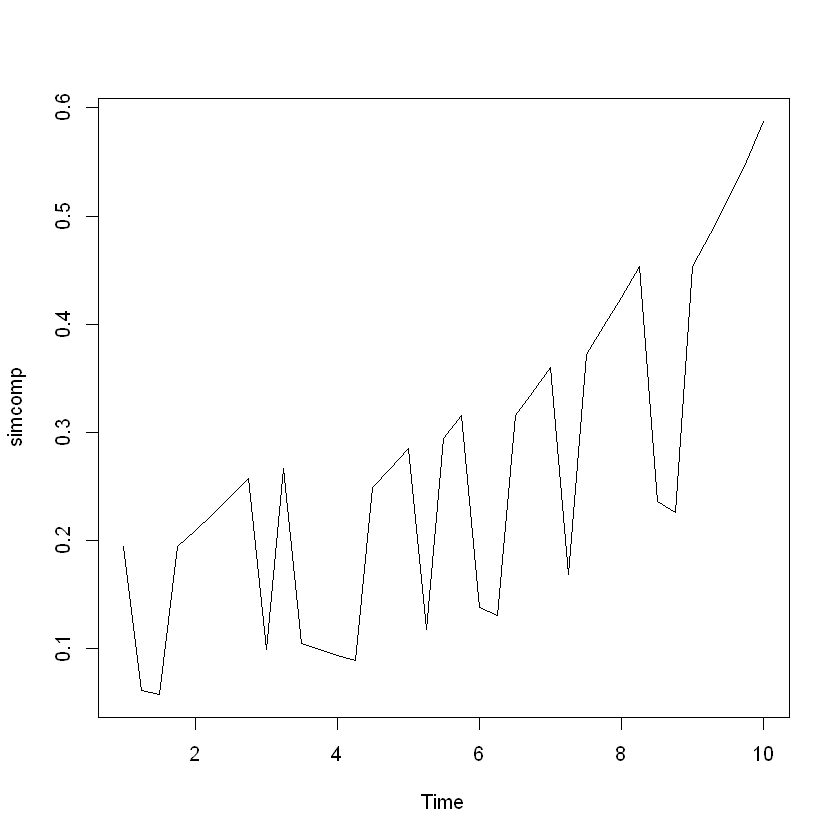

In [4]:
#Simulated compensation plot
plot.ts(simcomp)

In [5]:
#Decompose simulated salaries in statonary and tendency components. 
simcomp_Components <- decompose(simcomp)

In [6]:
#Save Components of the time series as cvs
df_comp <- data.frame(x=as.numeric(simcomp_Components$x),
                 seasonal=as.numeric(simcomp_Components$seasonal), 
                 trend=as.numeric(simcomp_Components$trend), 
                 random=as.numeric(simcomp_Components$random))
df_comp[is.na(df_comp)] <- 0
write.csv(df_comp,"Data\\sim_comp_pareto.csv", row.names = FALSE)

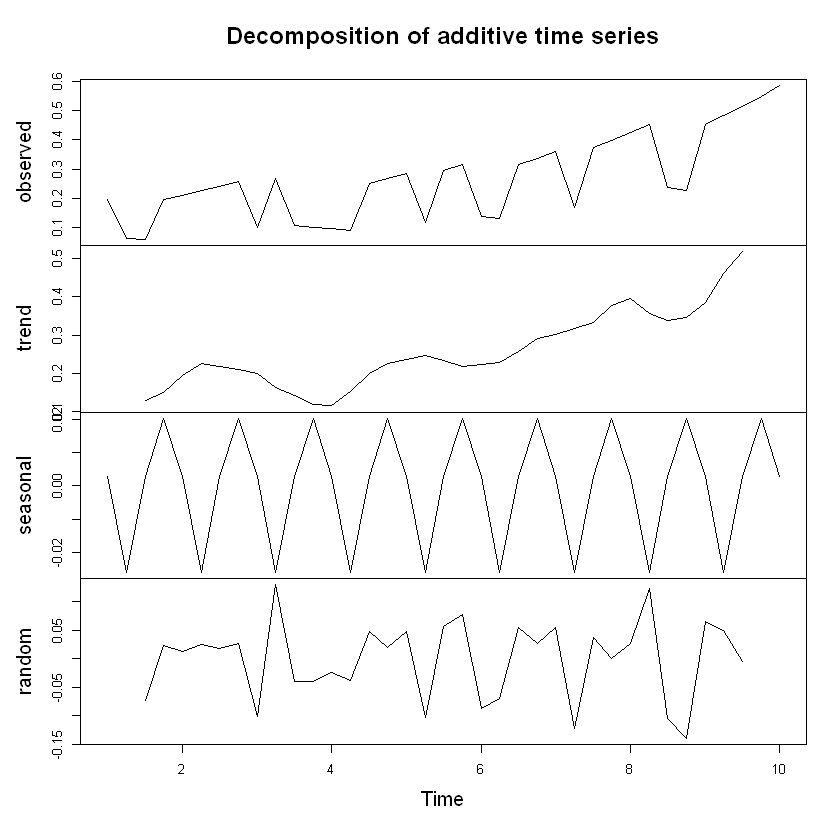

In [7]:
#Components plot
plot(simcomp_Components)

### Wang Distribution

In [8]:
#Read Simulated Data Base
rm(list=ls())
SimulatedData <- read.csv(file = 'Data/Simulations/Sim_MODPA2_eps01_d20_y0408.csv')
names(SimulatedData)

[1] "Deltas"            "Effort"            "Compensations"    
[4] "Outputs"           "Agent_Utility"     "Principal_Utility"

In [9]:
#Simulated Salaries' Time Serires. 
simcomp <- ts(SimulatedData$Compensations[1:40], start = 1, end = 10, frequency = 4)

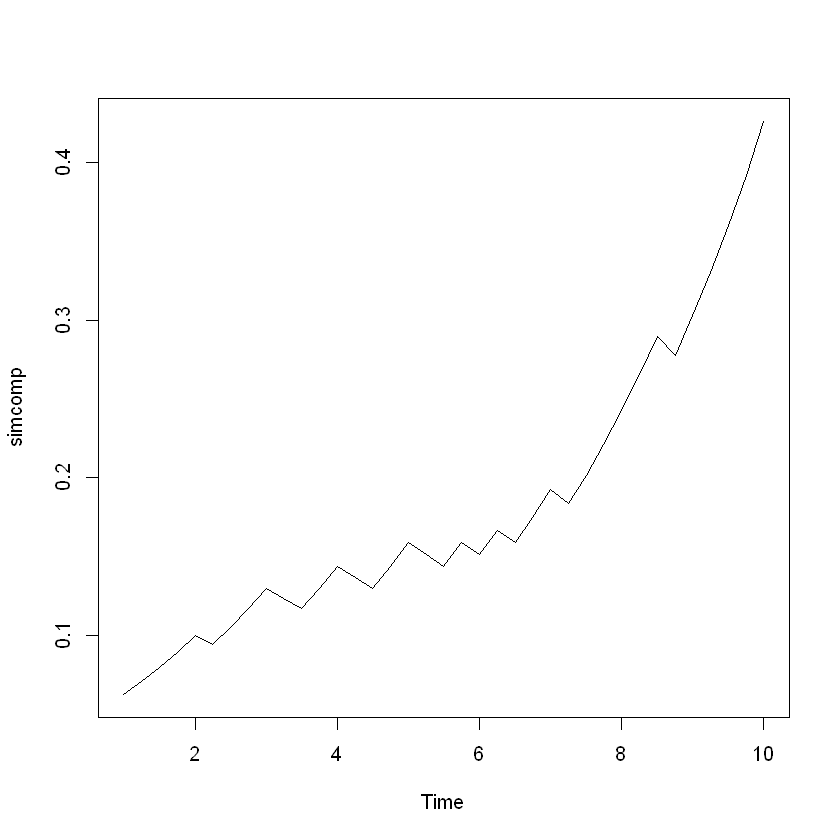

In [10]:
#Simulated compensation plot
plot.ts(simcomp)

In [11]:
#Decompose simulated salaries in statonary and tendency components. 
simcomp_Components <- decompose(simcomp)

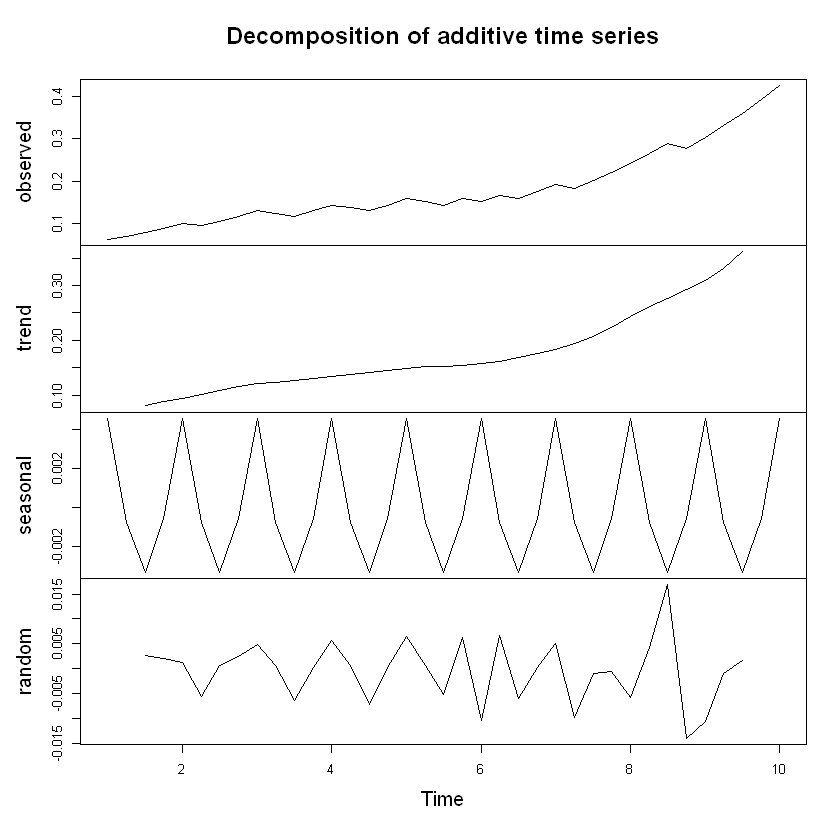

In [12]:
#Components plot
plot(simcomp_Components)

In [13]:
#Save Components of the time series as cvs
df_comp <- data.frame(x=as.numeric(simcomp_Components$x),
                 seasonal=as.numeric(simcomp_Components$seasonal), 
                 trend=as.numeric(simcomp_Components$trend), 
                 random=as.numeric(simcomp_Components$random))
df_comp[is.na(df_comp)] <- 0
write.csv(df_comp,"Data\\sim_comp_wang.csv", row.names = FALSE)

## Observed CEO Compensations. 

In [14]:
#Read Observed DataBase. 
ObservedData <- read.csv(file = 'Data/compensation_full.csv')
names(ObservedData)

[1] "companyid"                   "year"                       
 [3] "filingdate"                  "personid"                   
 [5] "proid"                       "companyname"                
 [7] "yearfounded"                 "countryid"                  
 [9] "stateid"                     "personname"                 
[11] "yearborn"                    "title"                      
[13] "prorank"                     "boardrank"                  
[15] "proflag"                     "currentproflag"             
[17] "boardflag"                   "currentboardflag"           
[19] "csub3"                       "csub4"                      
[21] "csub36"                      "csub47"                     
[23] "csub1"                       "csub2"                      
[25] "csub5"                       "csub7"                      
[27] "csub8"                       "csub9"                      
[29] "csub10"                      "csub11"                     
[31] "csub12"                      "csub13"                     
[33] "csub14"                      "csub15"                     
[35] "csub16"                      "csub17"                     
[37] "csub18"                      "csub37"                     
[39] "csub38"                      "csub39"                     
[41] "csub40"                      "csub41"                     
[43] "csub42"                      "csub43"                     
[45] "csub44"                      "csub45"                     
[47] "csub46"                      "csub48"                     
[49] "csub49"                      "csub51"                     
[51] "csub52"                      "csub53"                     
[53] "csub54"                      "csub56"                     
[55] "csub57"                      "csub58"                     
[57] "csub59"                      "csub60"                     
[59] "csub61"                      "csub62"                     
[61] "csub63"                      "csub6"                      
[63] "csub50"                      "csub55"                     
[65] "compensationsubtypesequence" "gvkey"

In [15]:
#Filter CEOs with at least 12 observations.
Names <- ObservedData %>% 
    group_by(personid) %>%
    summarise(unique_obs = n_distinct(filingdate)) %>%
    filter(unique_obs>=12)
ObservedData <- ObservedData %>% 
    filter(personid %in% Names$personid)

In [16]:
Names

personid,unique_obs
<int>,<int>
143076,14
169340,18
169600,12
191572,12
203678,13
238675,13
284348,13
312190,12
312208,12


[1] 143076
[1] 169340


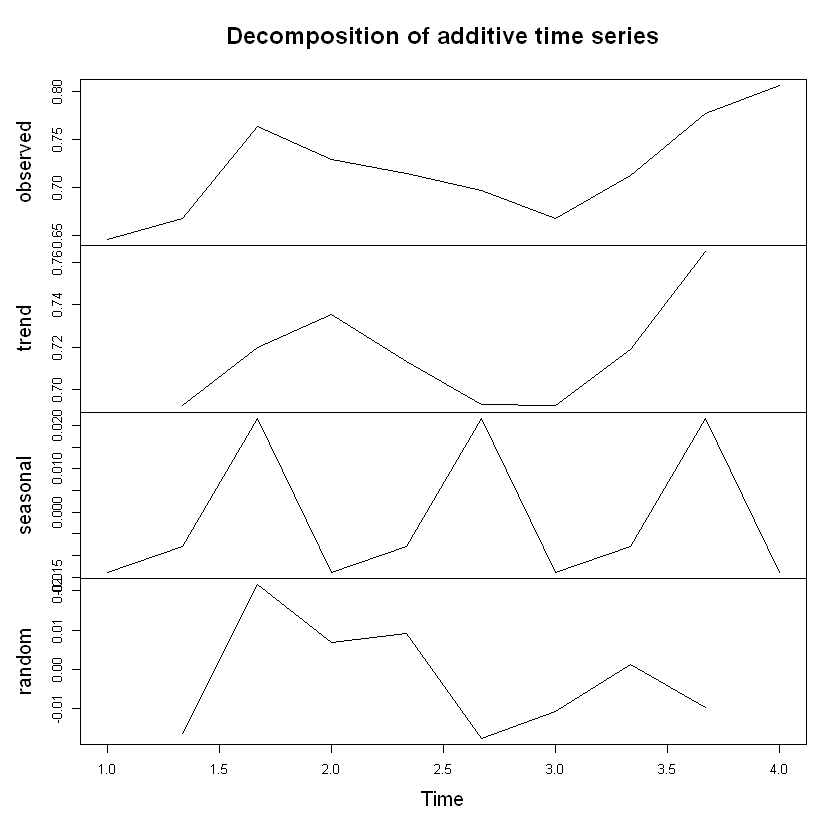

[1] 191572


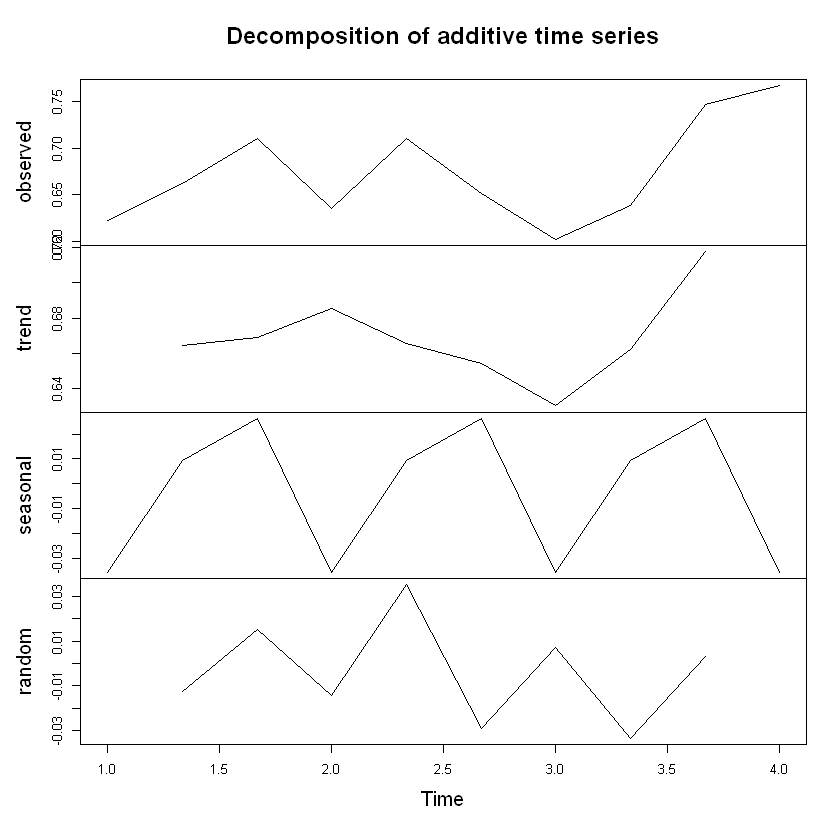

[1] 203678


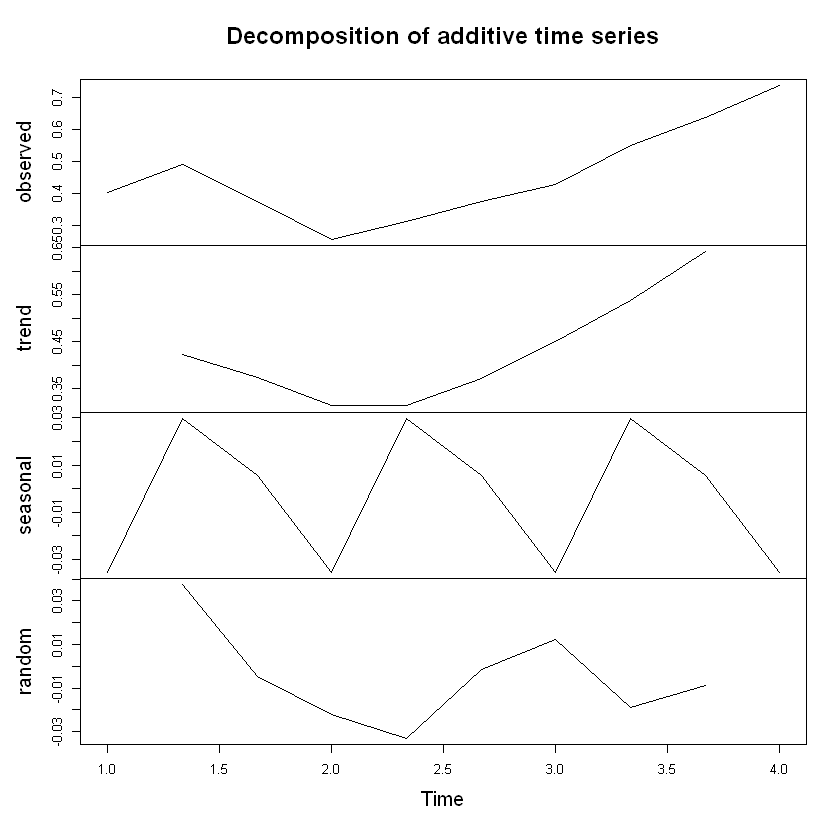

[1] 238675


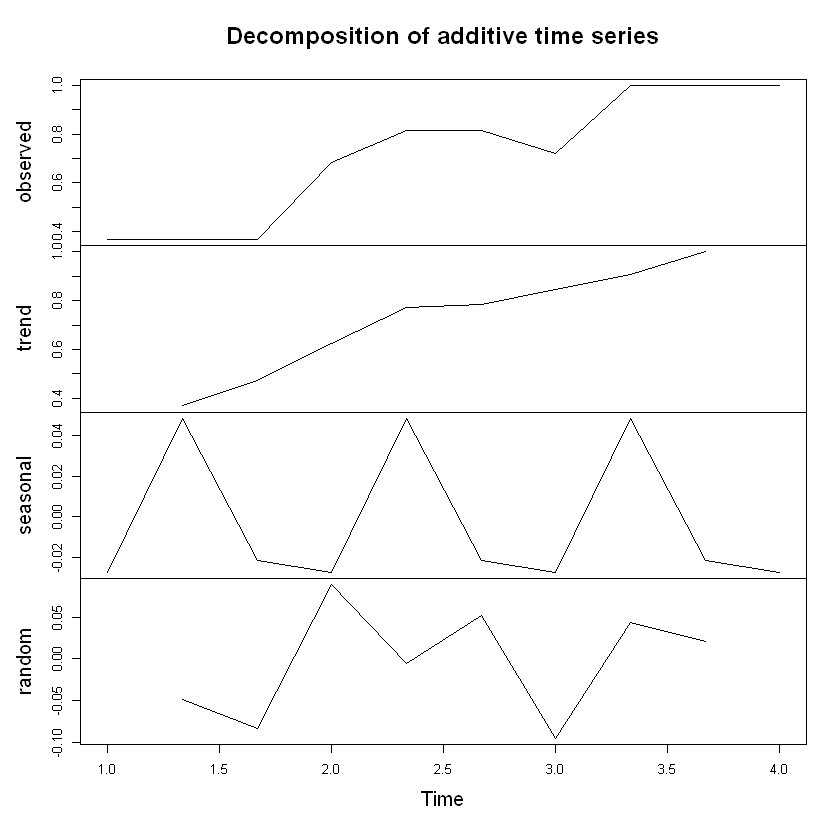

[1] 284348


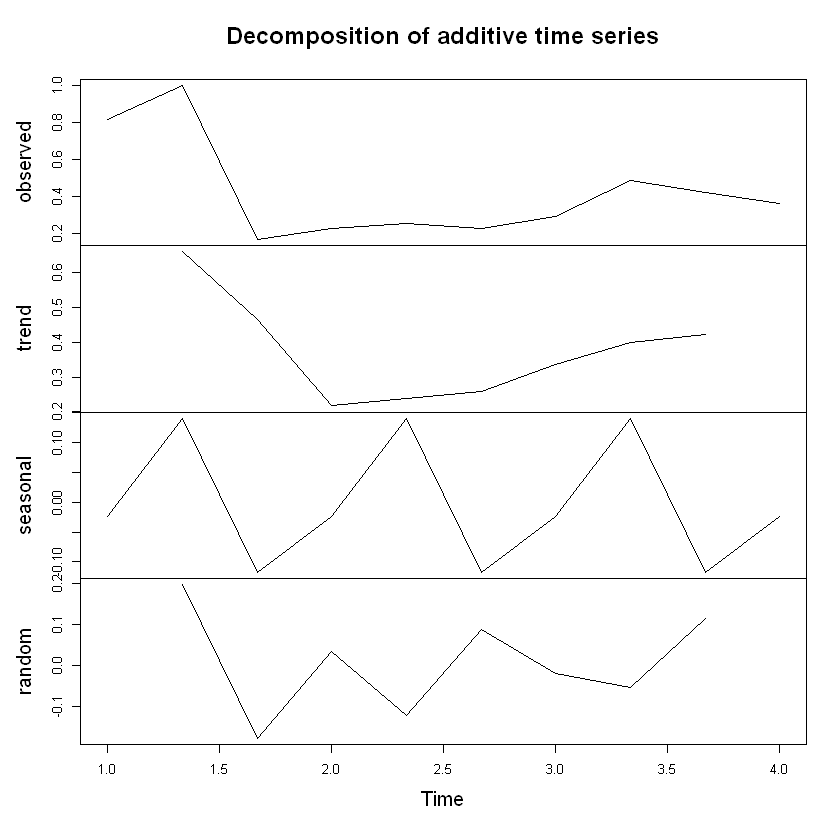

[1] 312190


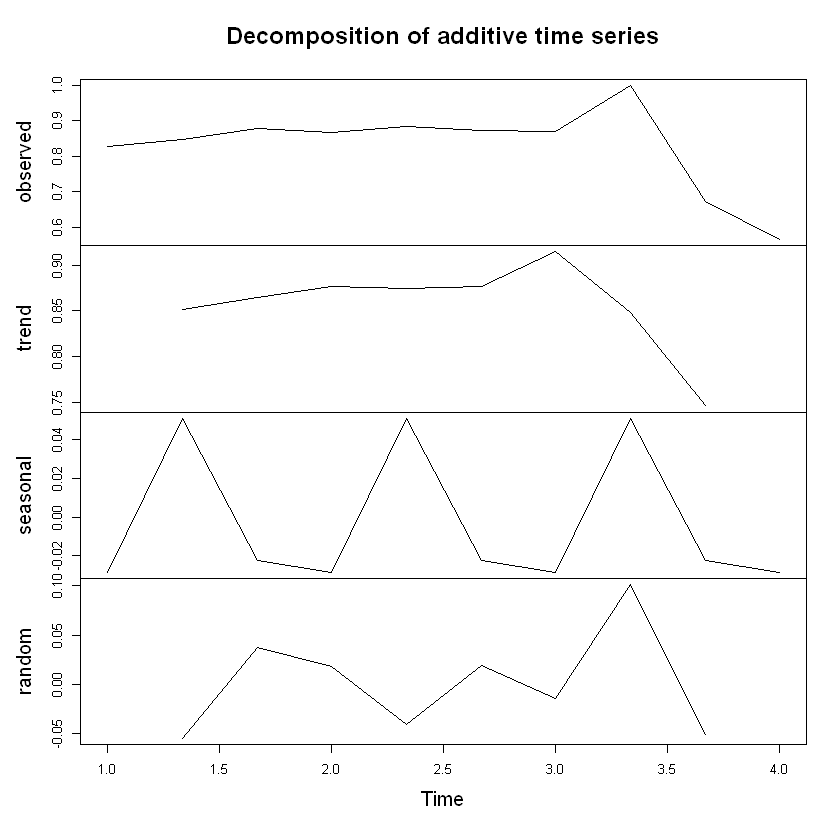

[1] 312208


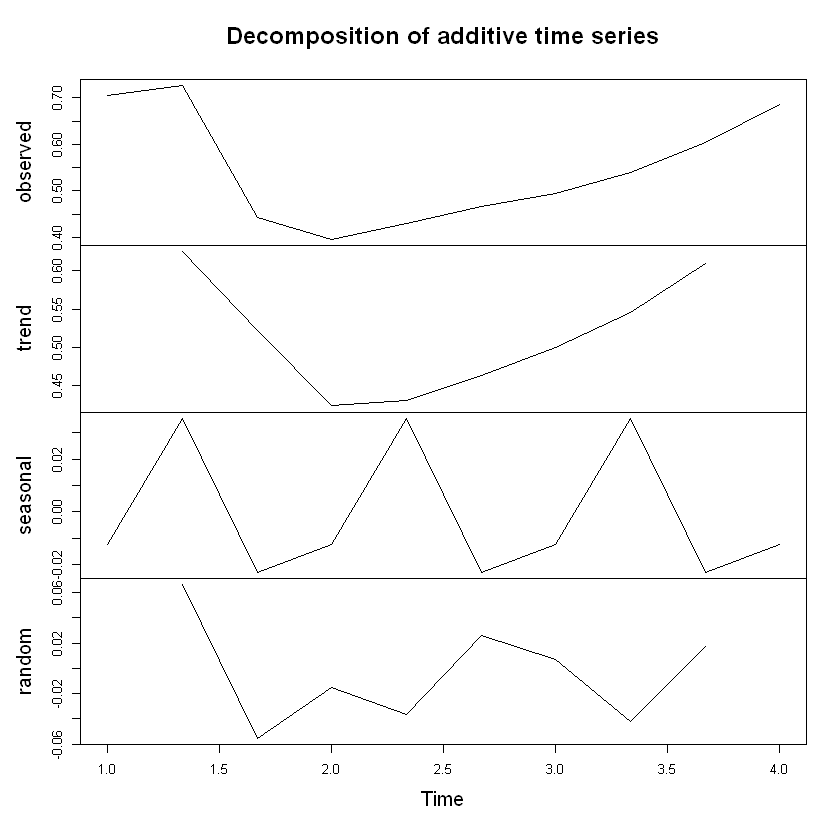

[1] 364042


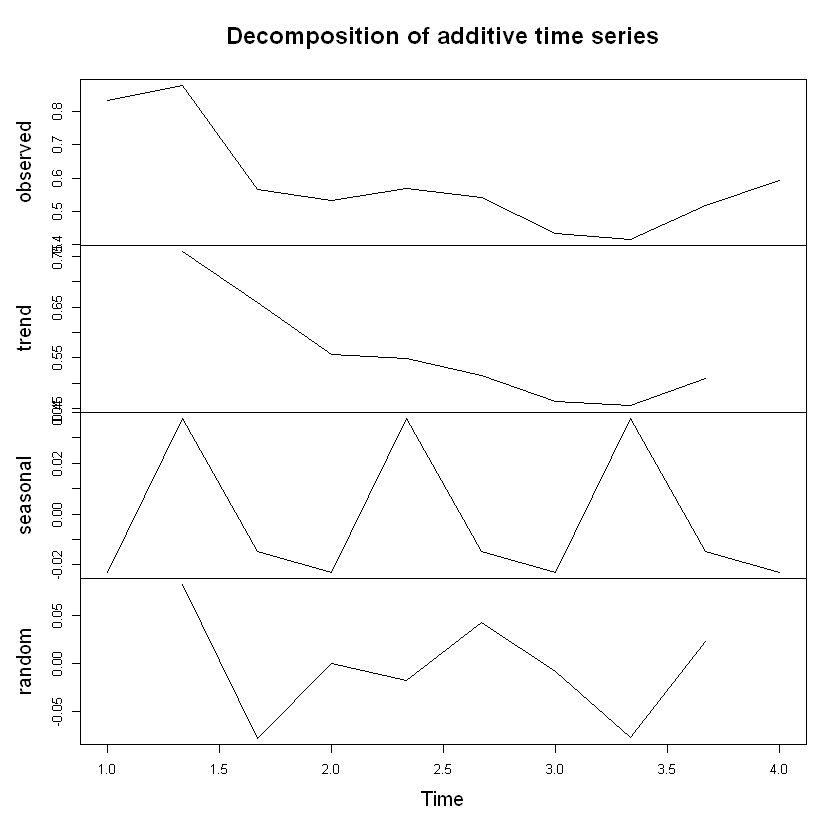

[1] 394053


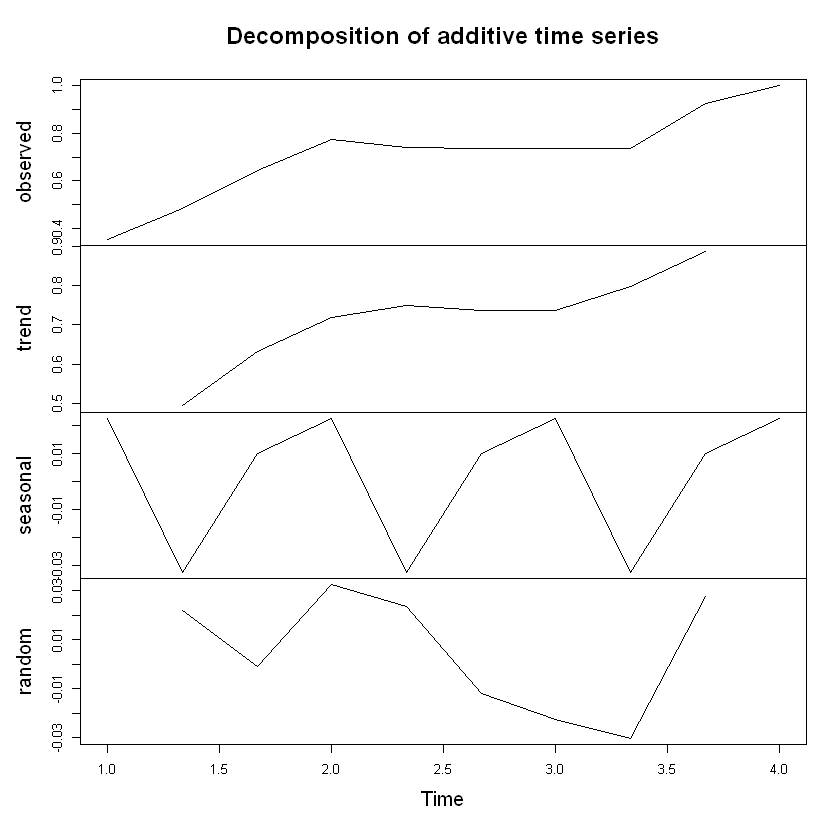

[1] 548250


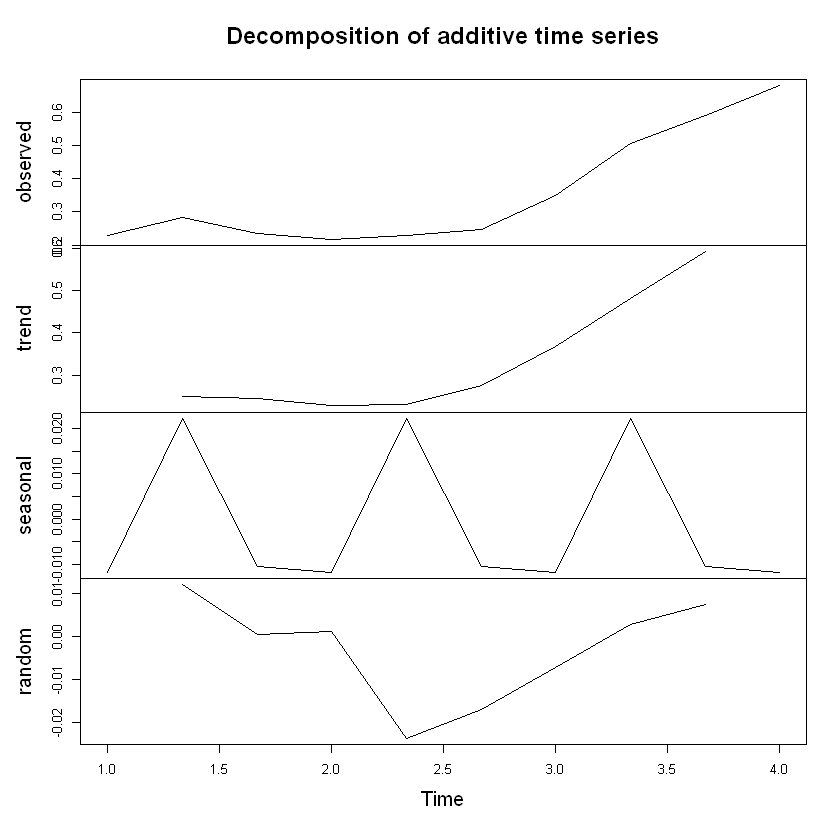

[1] 1113582


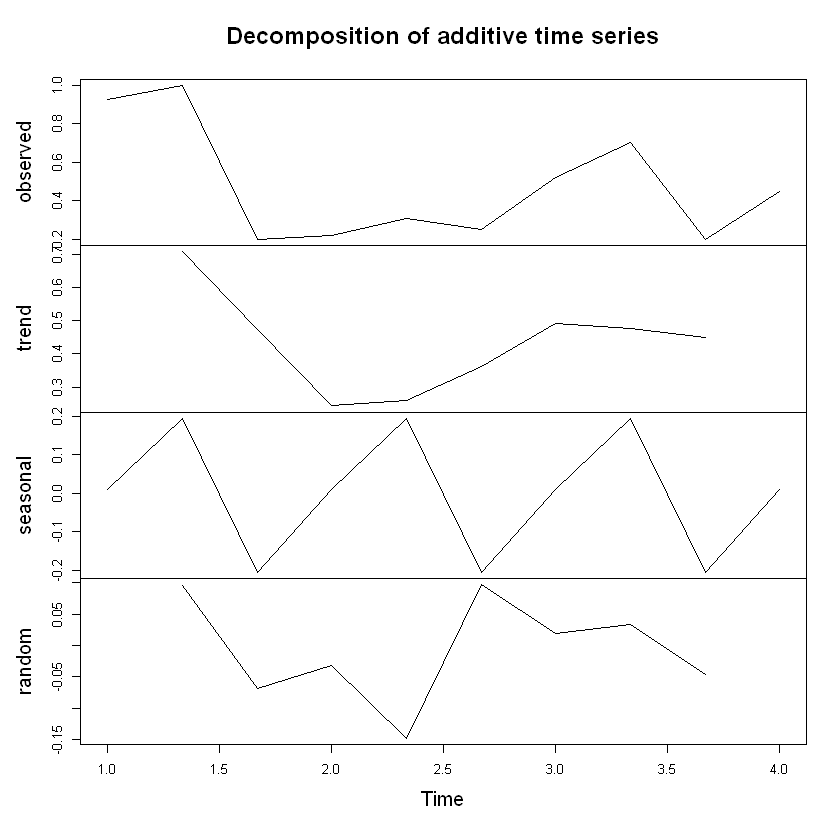

[1] 1132479


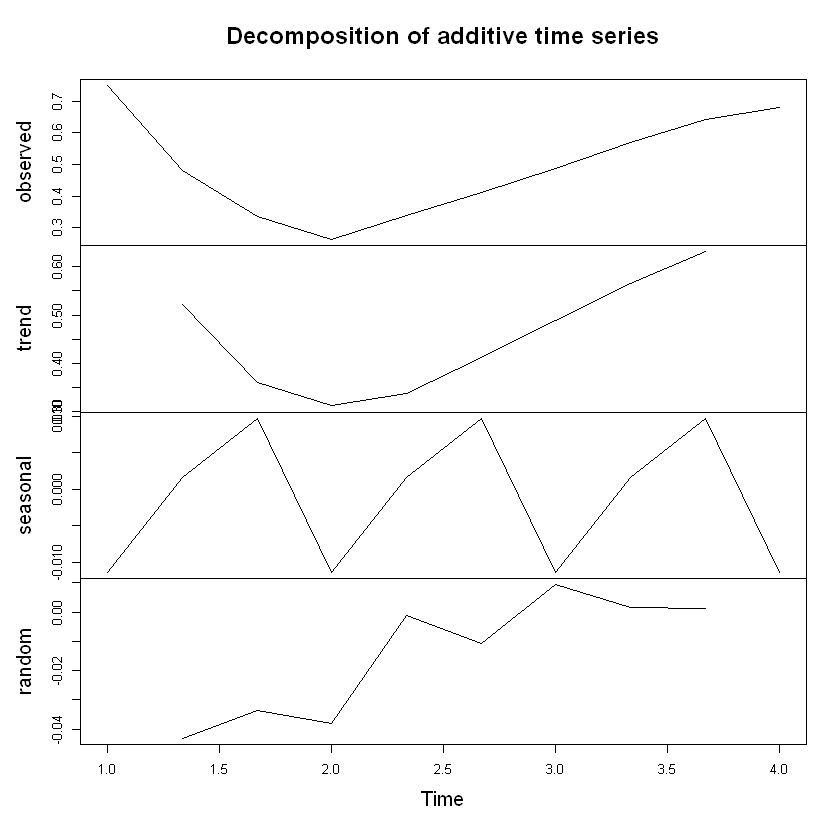

[1] 1147082


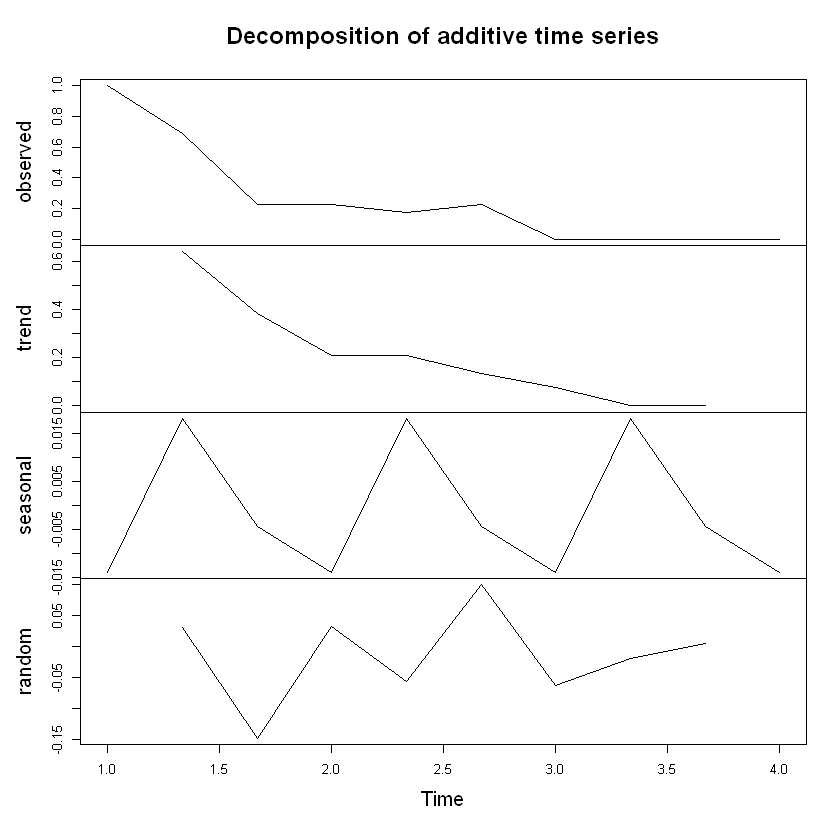

[1] 1890111


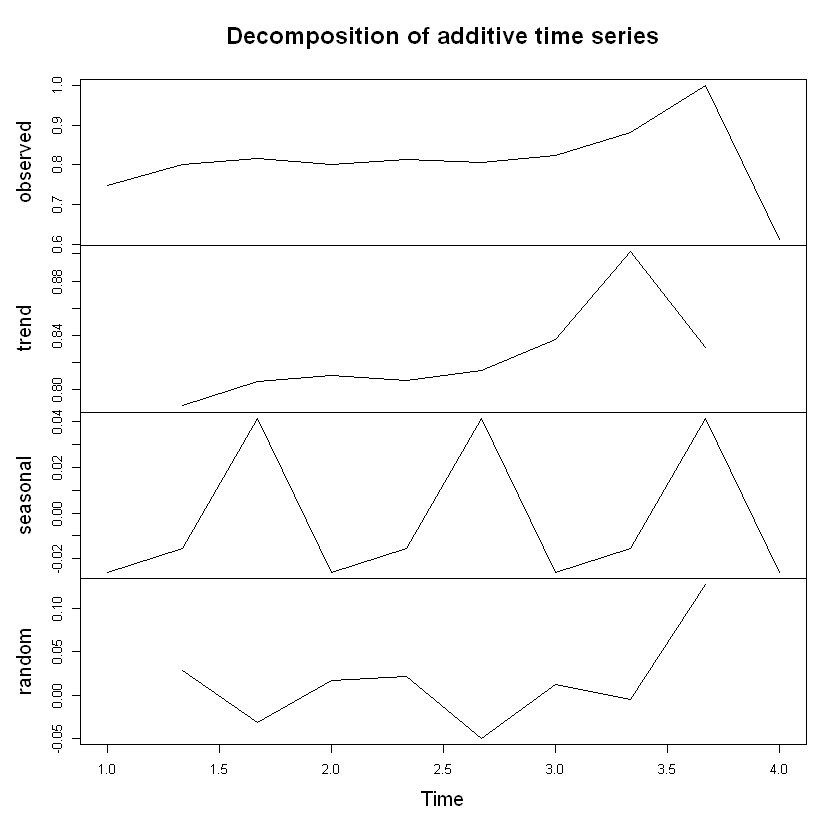

[1] 1984704


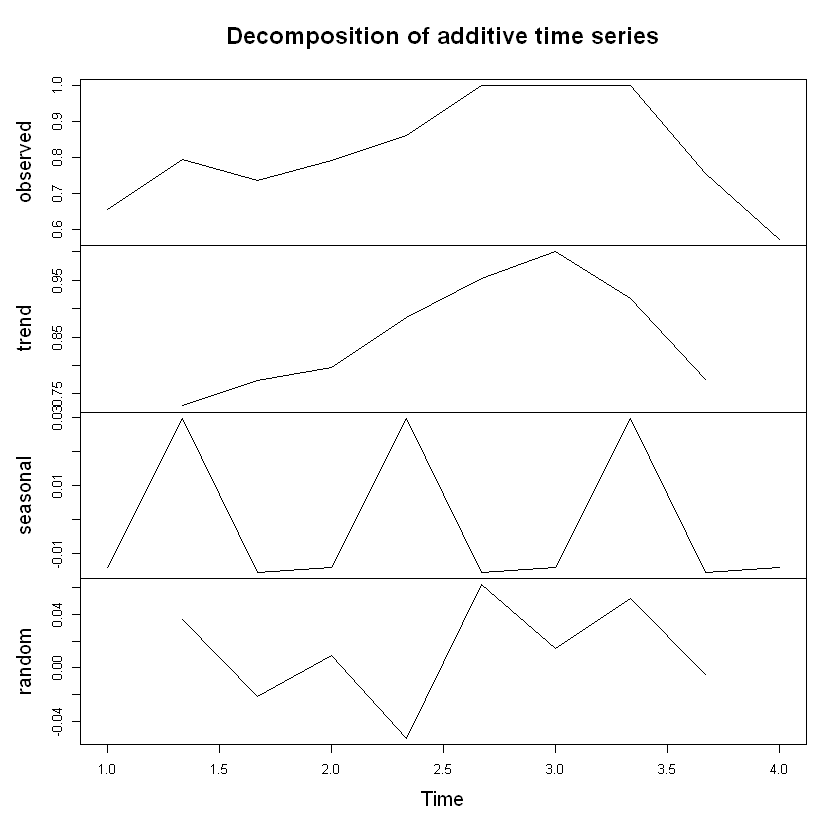

[1] 2015292


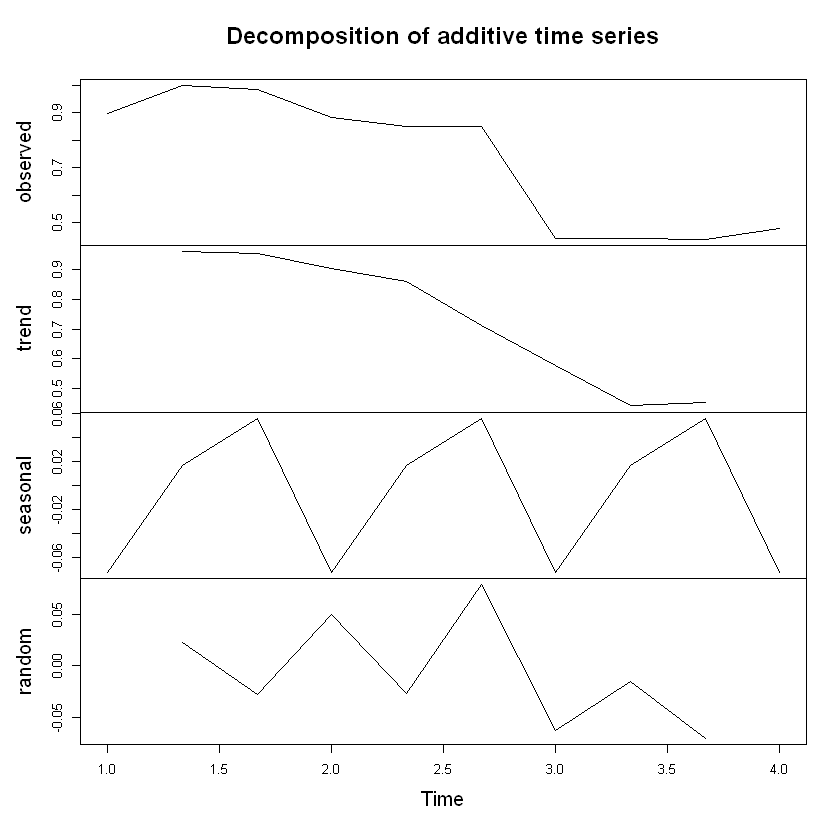

[1] 7822052


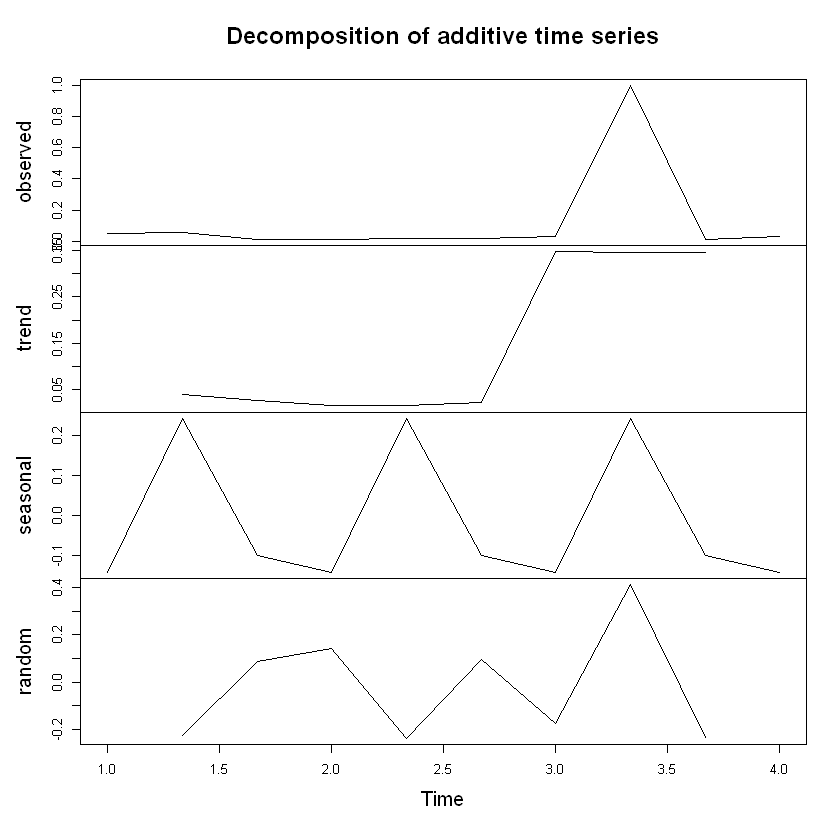

[1] 8001569


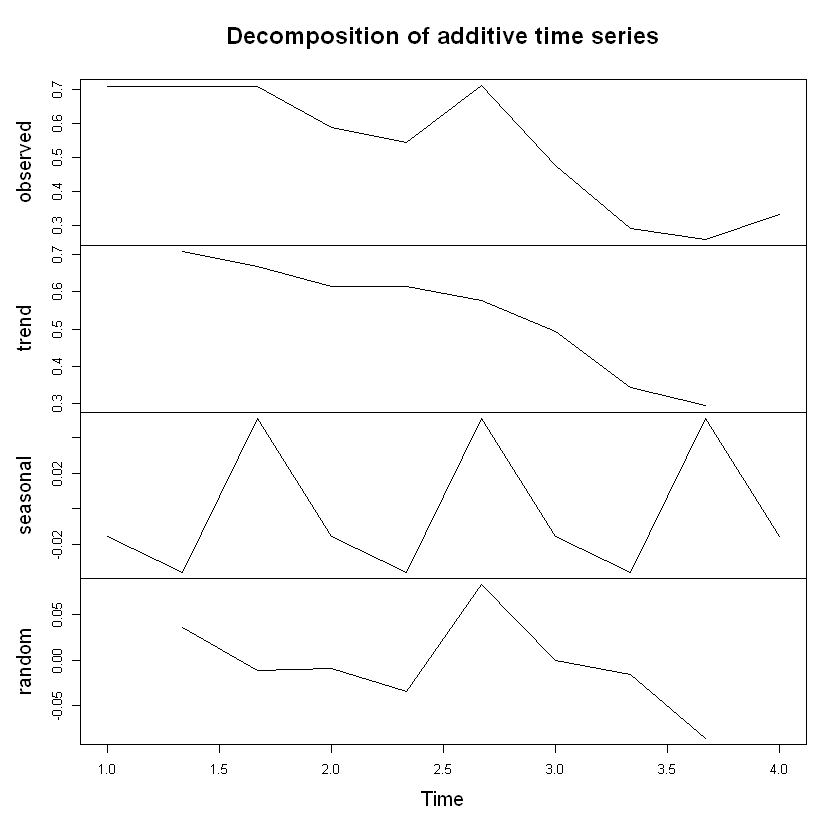

[1] 8022881


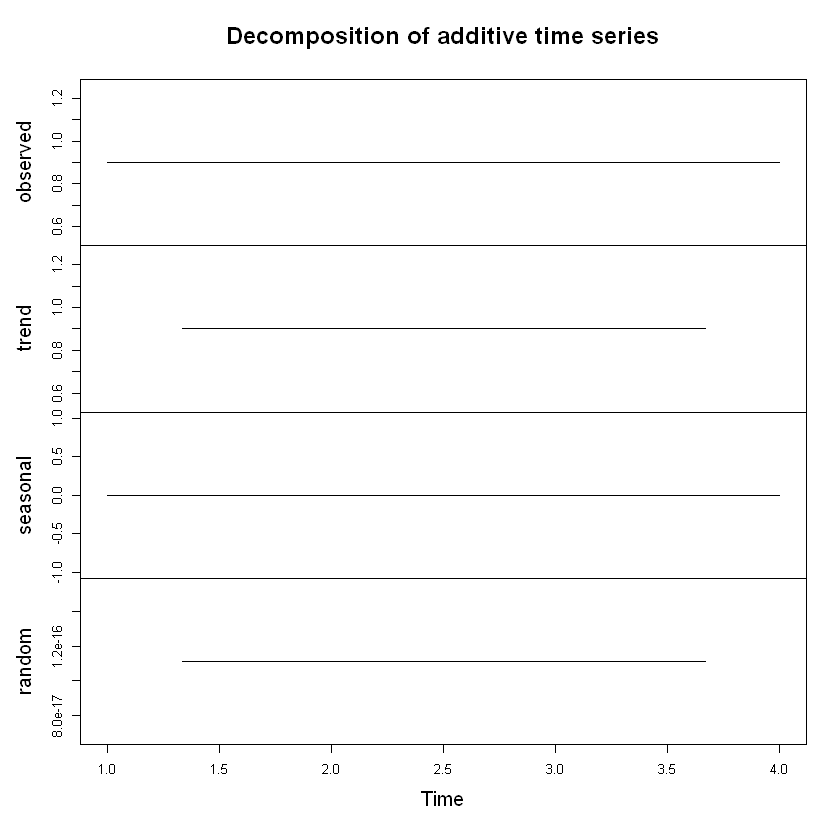

[1] 8022883


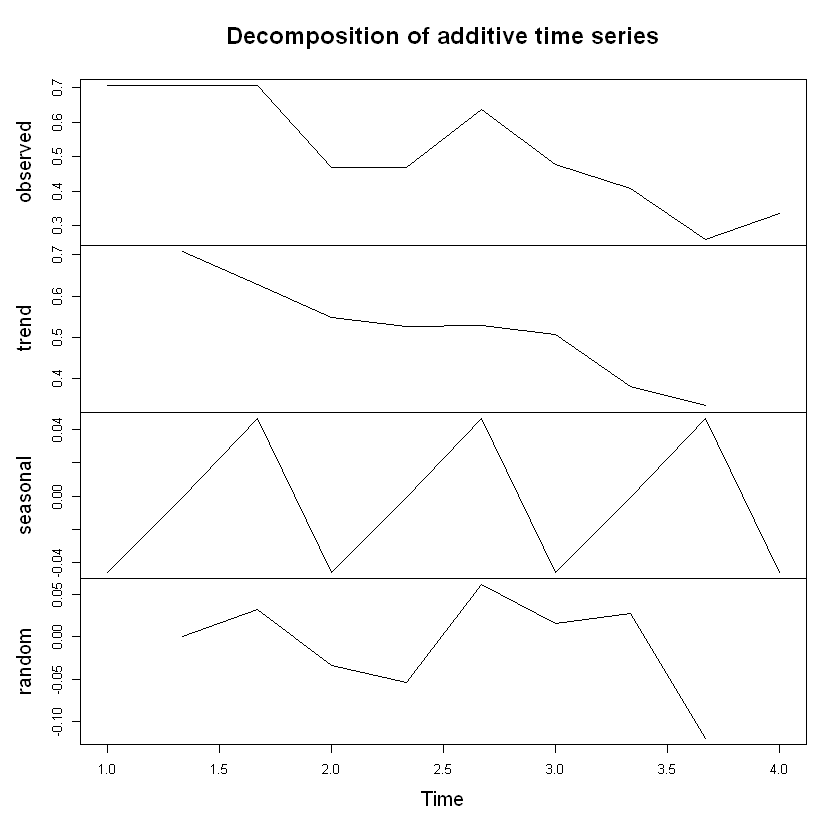

[1] 8097269


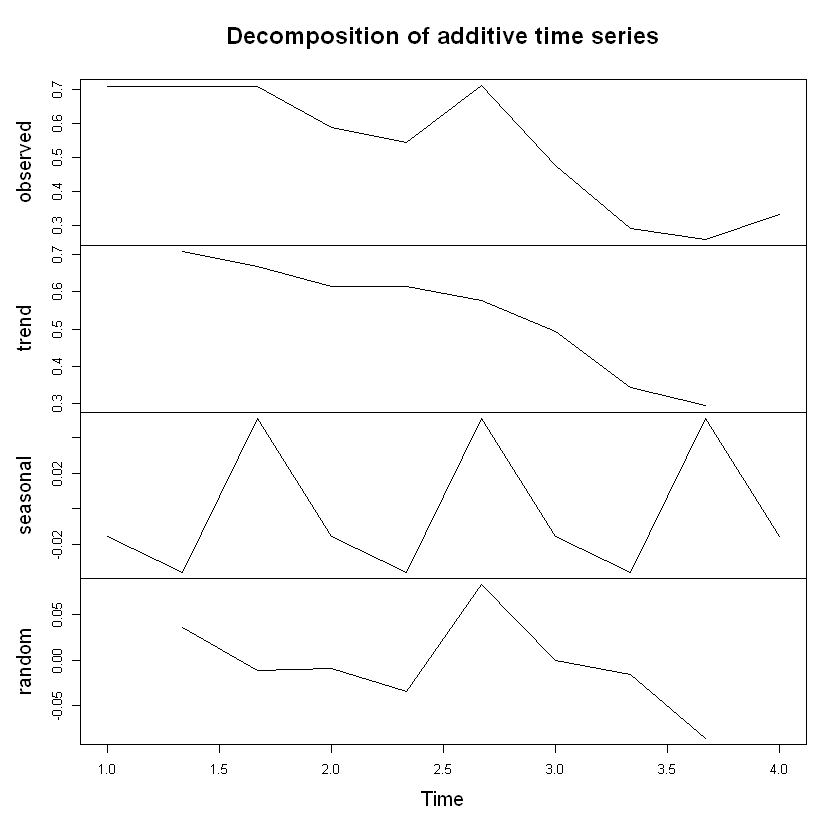

[1] 8114728


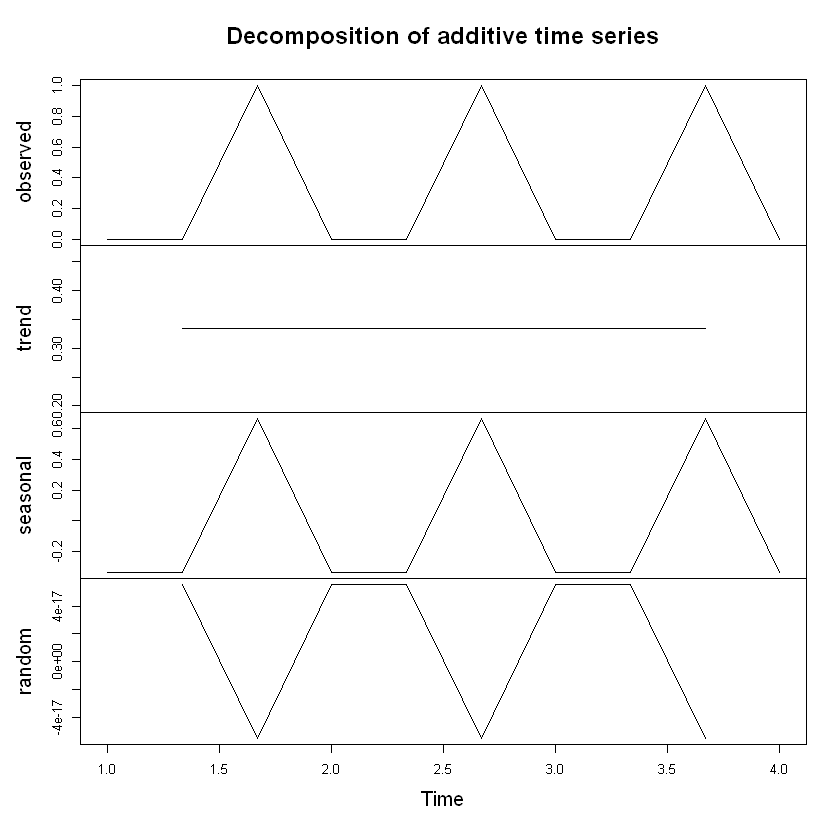

[1] 8598472


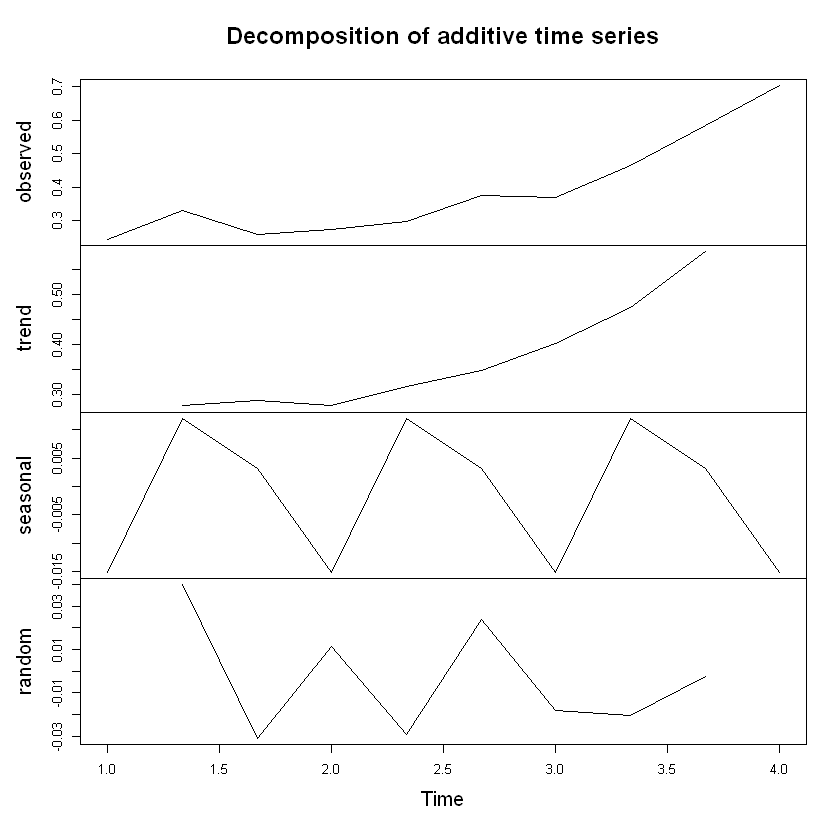

[1] 20820943


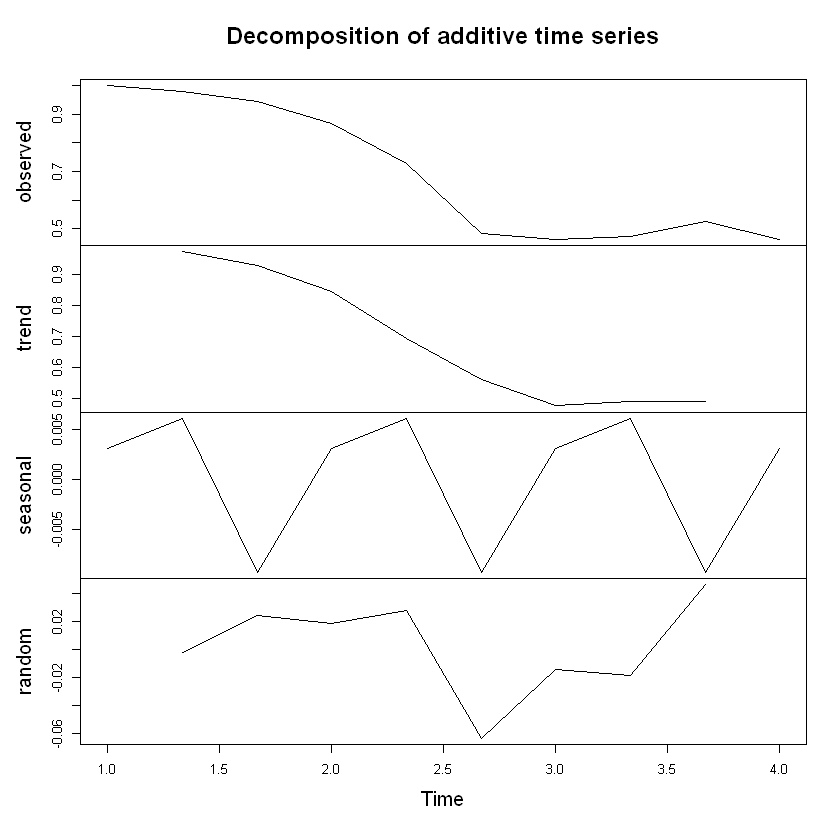

[1] 21788157


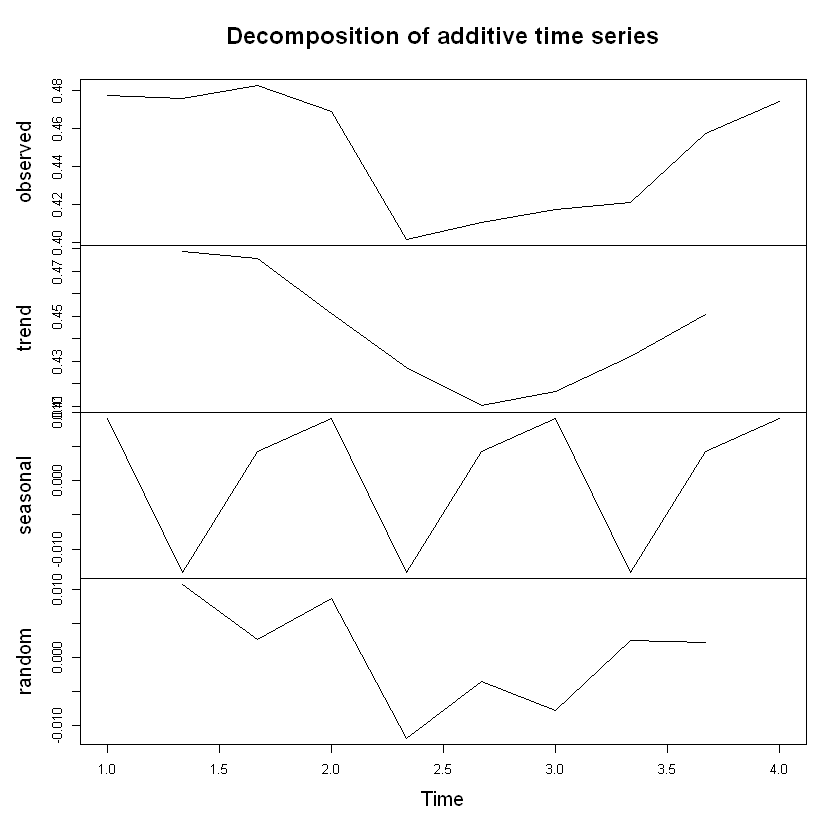

[1] 22037102


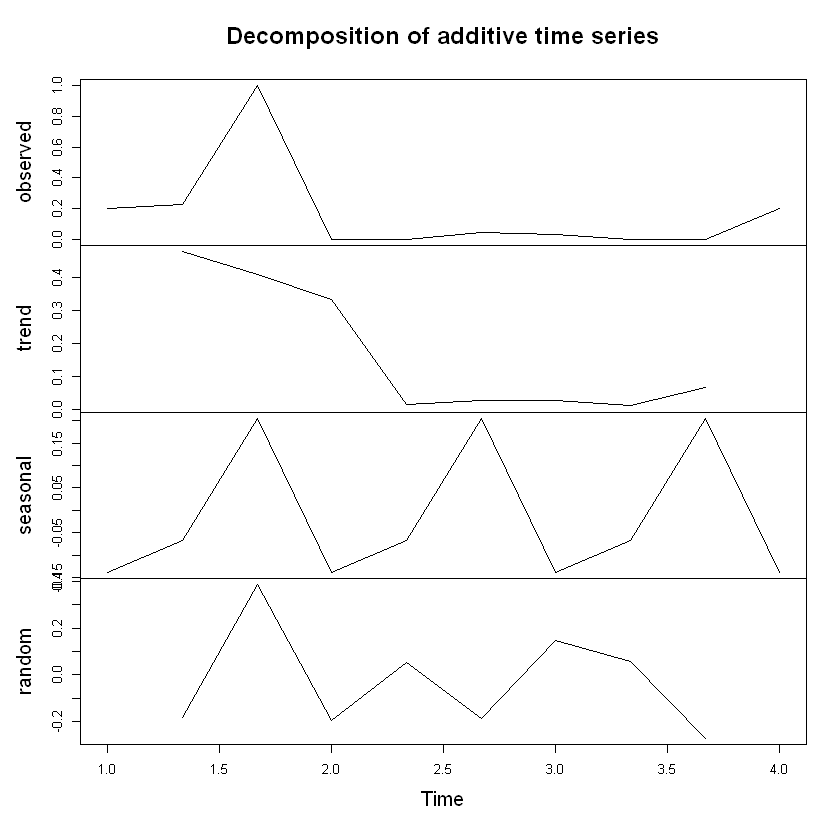

[1] 23314014


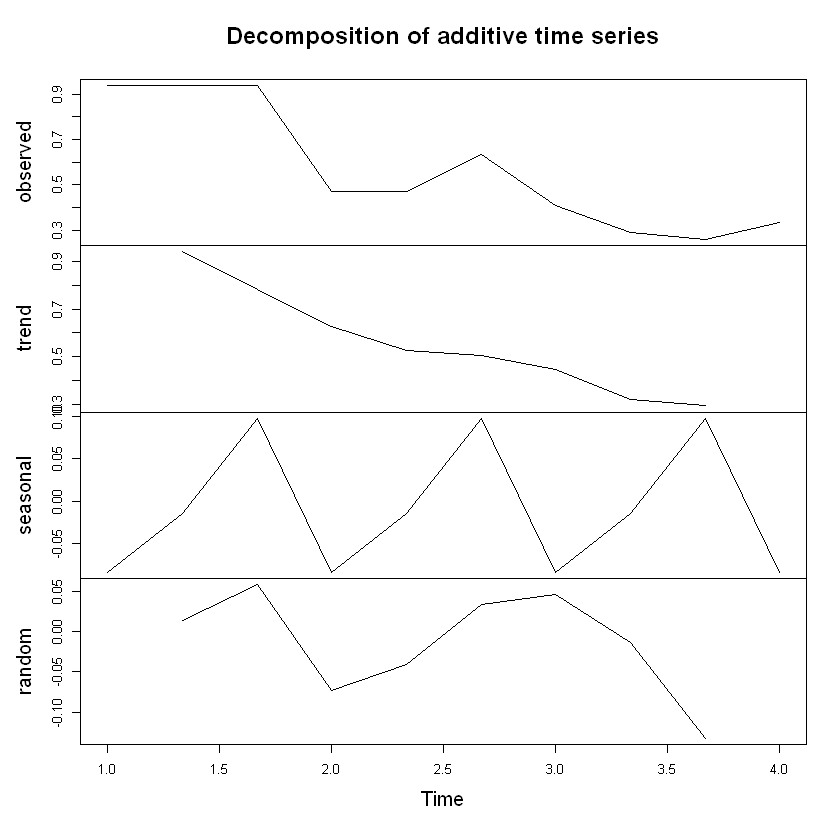

[1] 26746474


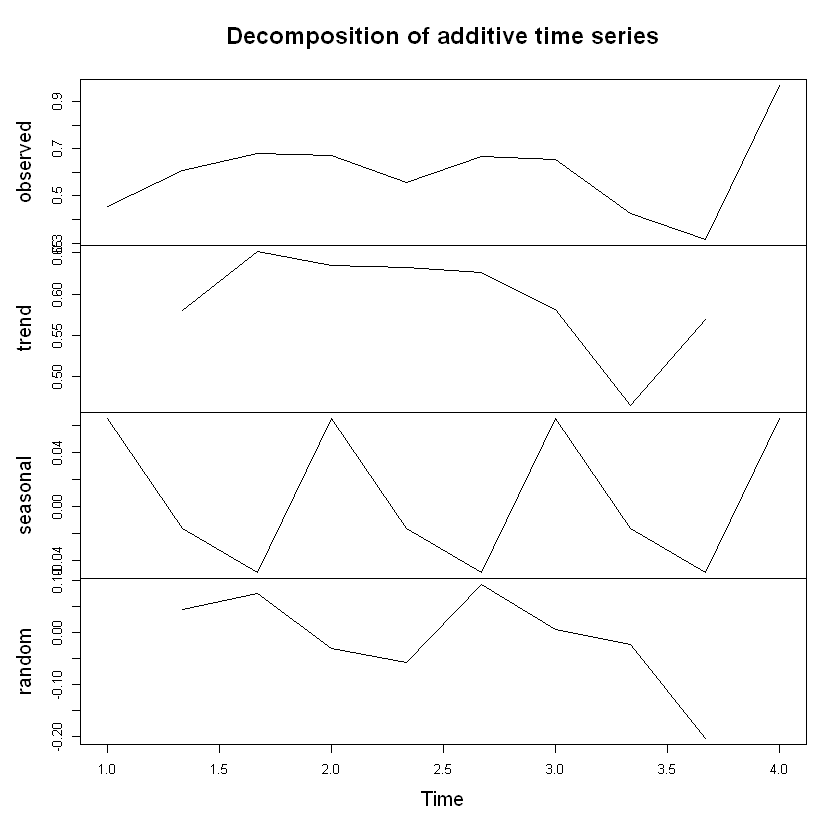

[1] 28845323


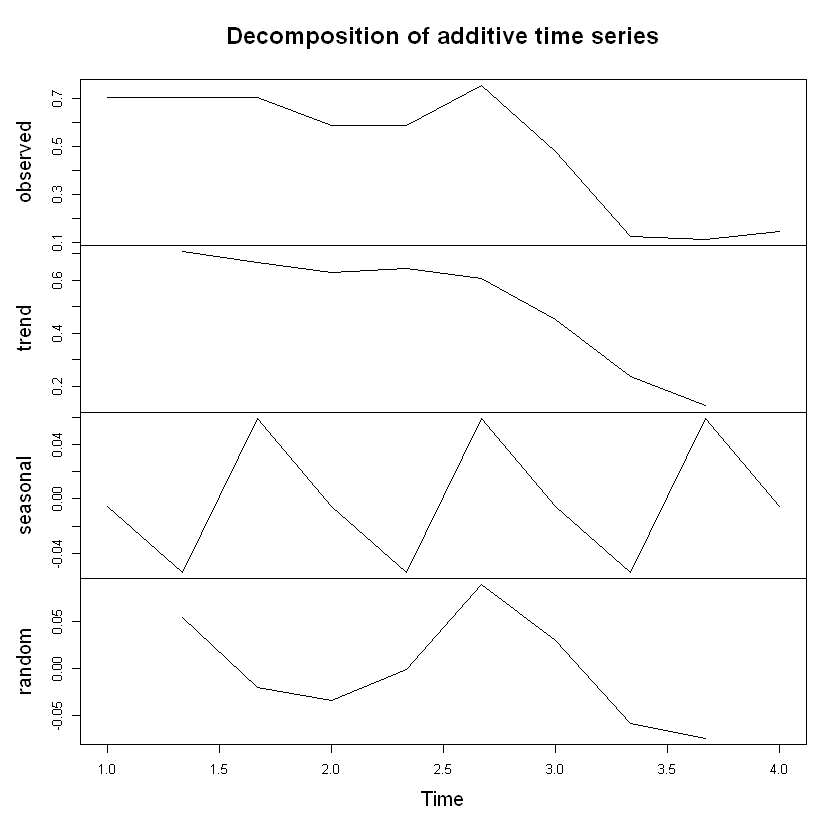

[1] 32509823


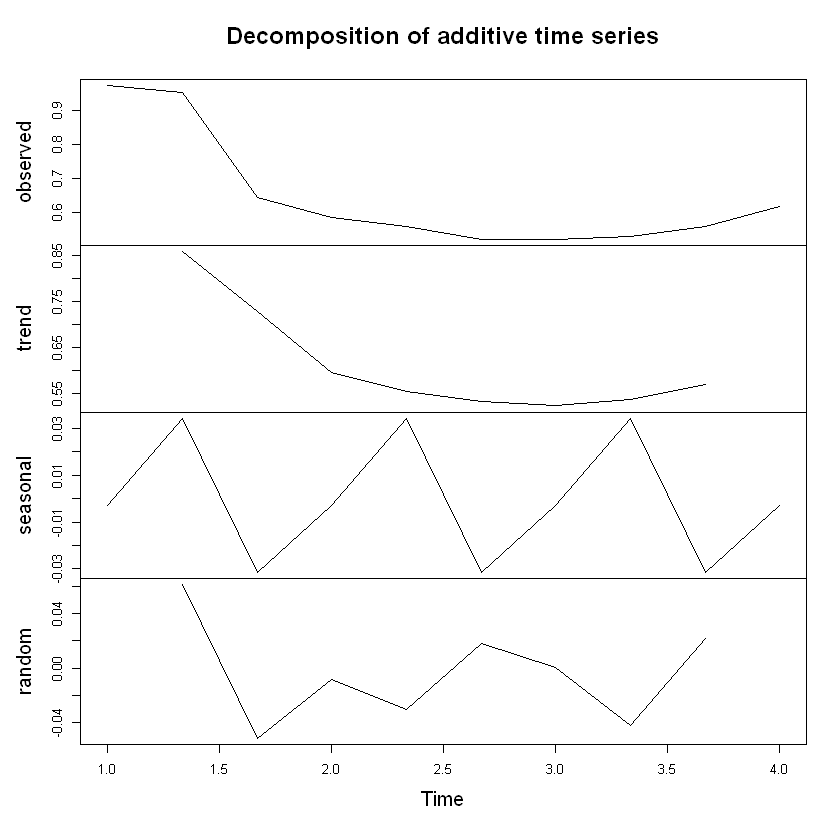

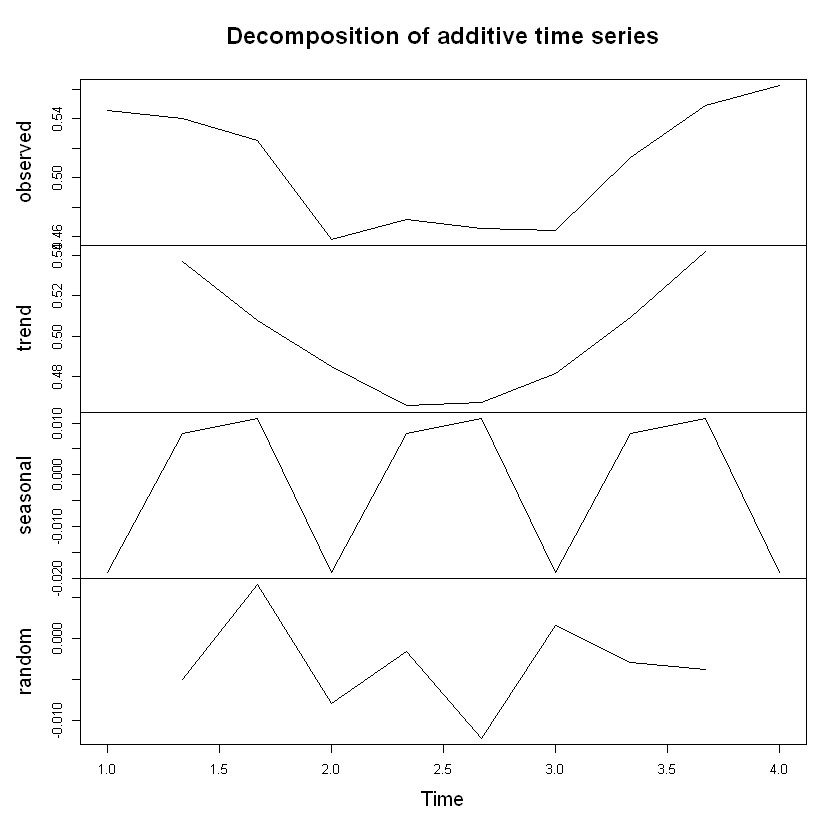

In [17]:
#For one observation
for(per in Names$personid){
    #Salary Mean 
    x <- ObservedData %>%
        select(c(personid, year, csub2)) %>%
        na.omit() %>%
        filter(year >= 2006) %>%
        filter(personid == per) %>%
        group_by(year) %>%
        summarise(sal = mean(csub2))
    if(max(x$sal) > 0){
        obscomp <- ts(x$sal/max(x$sal), start = 1, end = 4, 3)  
        #Decompose observed salaries in statonary and tendency components. 
        obscomp_Components <- decompose(obscomp)
        print(per)
        #Components plot
        plot(obscomp_Components)
    }
}

[1] 203678
[1] 238675


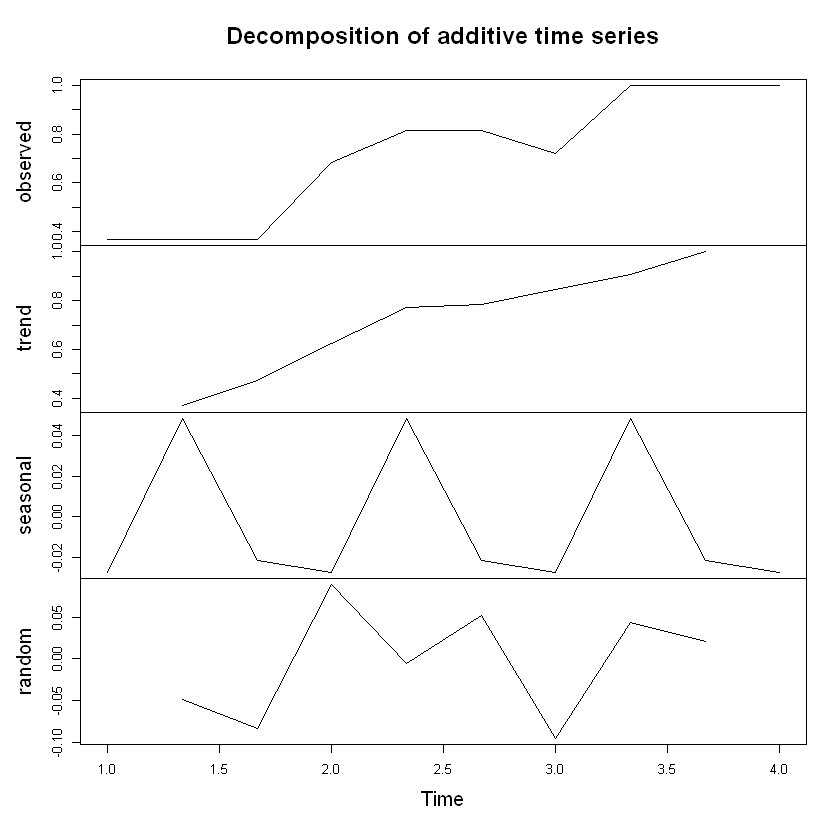

[1] 364042


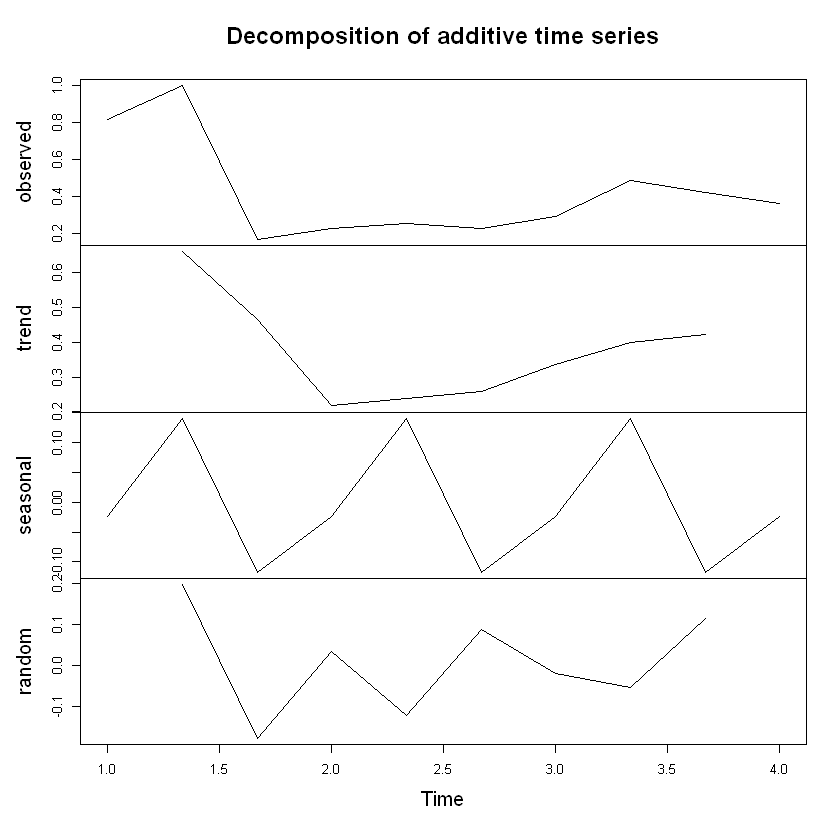

[1] 394053


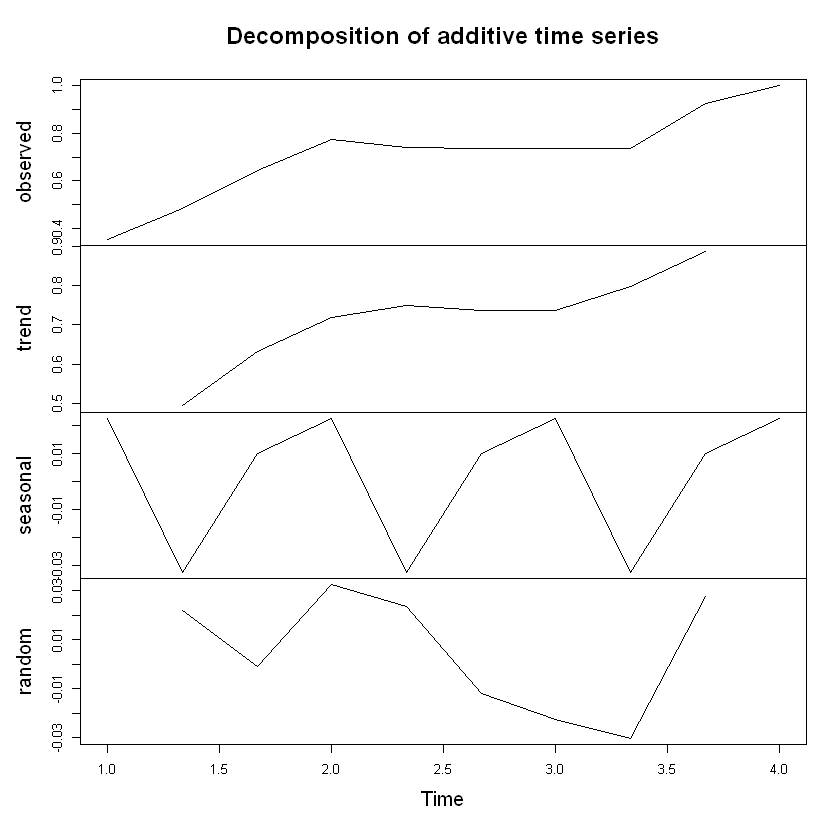

[1] 8022883


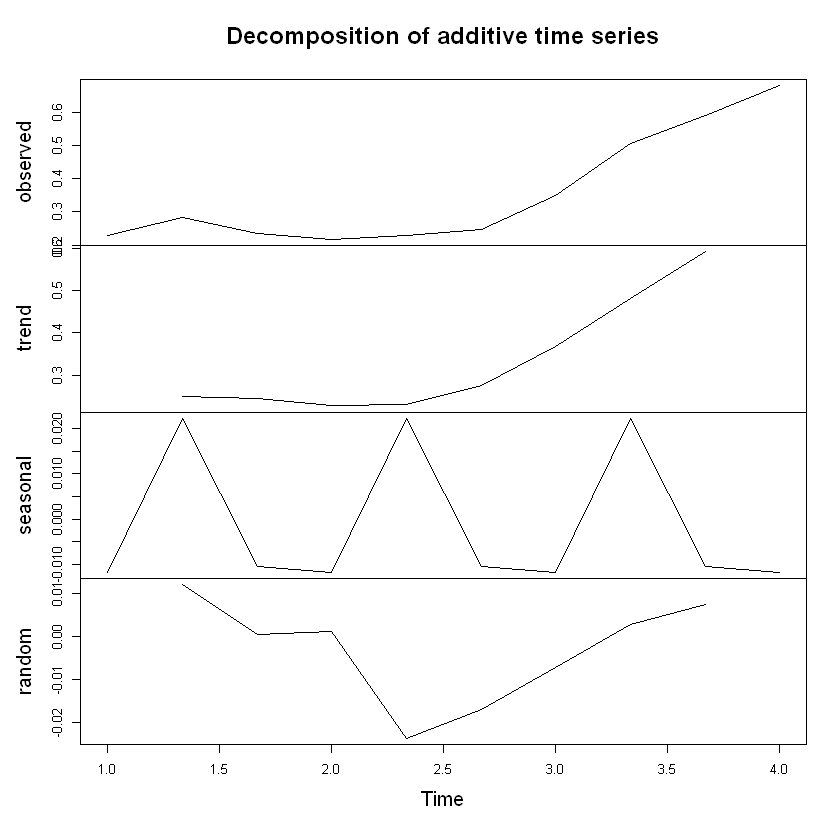

[1] 8598472


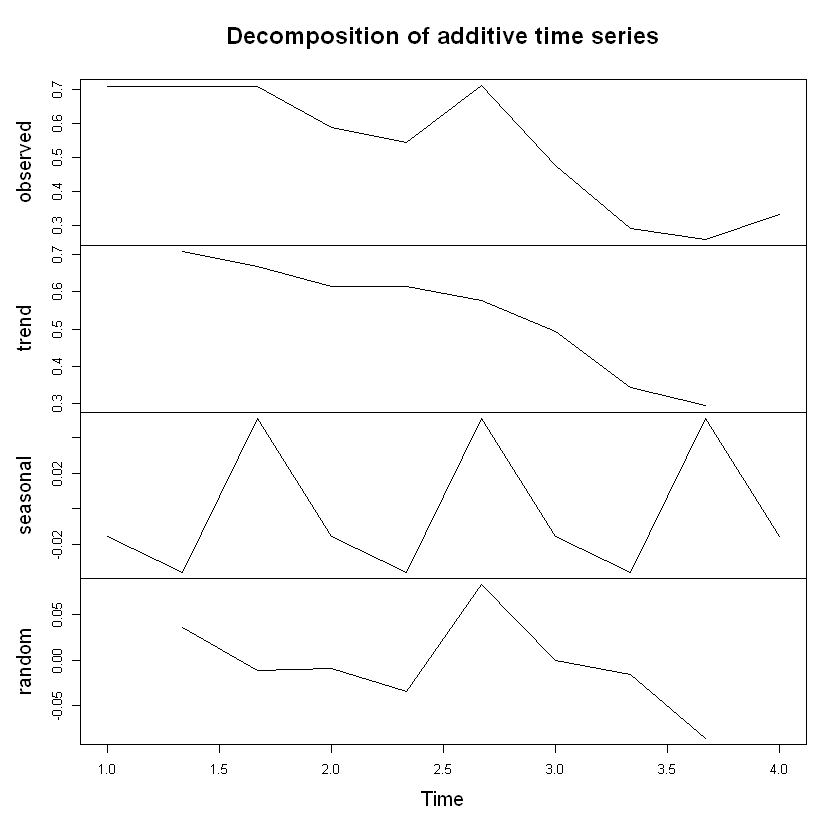

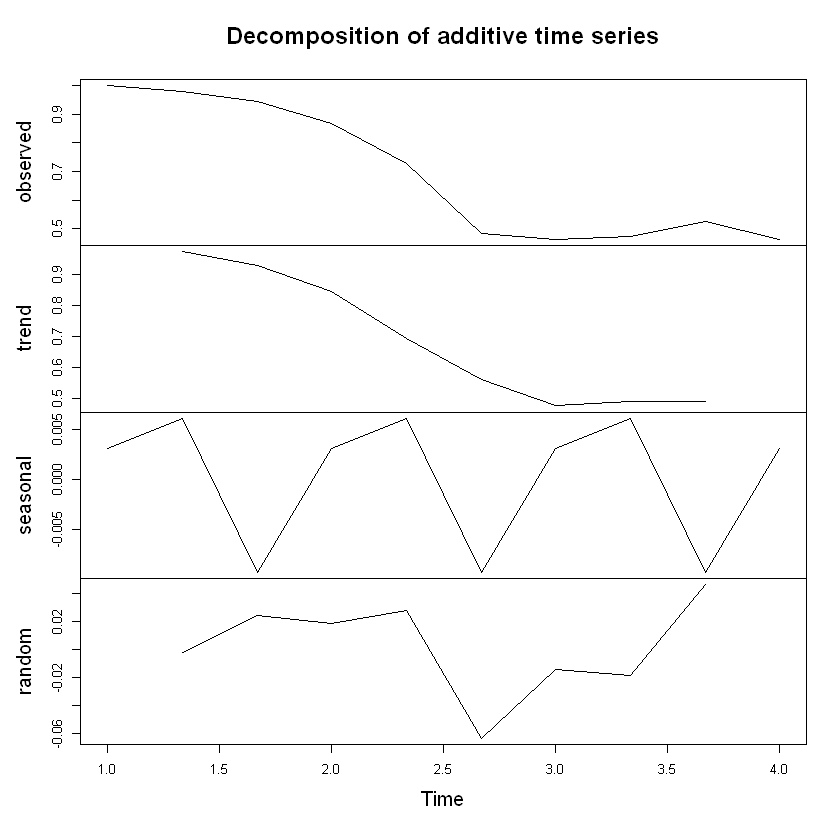

In [18]:
#6 Selected observations
Names_sel = c(203678, 238675, 364042, 394053, 8022883, 8598472)
for(per in Names_sel){
    #Salary Mean 
    x <- ObservedData %>%
        select(c(personid, year, csub2)) %>%
        na.omit() %>%
        filter(year >= 2006) %>%
        filter(personid == per) %>%
        group_by(year) %>%
        summarise(sal = mean(csub2))
    obscomp <- ts(x$sal/max(x$sal), start = 1, end = 4, 3)  
    #Decompose observed salaries in statonary and tendency components. 
    obscomp_Components <- decompose(obscomp)
    print(per)
    #Components plot
    plot(obscomp_Components)
    #Save Components of the time series as cvs
    df_comp <- data.frame(x=as.numeric(obscomp_Components$x),
                     seasonal=as.numeric(obscomp_Components$seasonal), 
                     trend=as.numeric(obscomp_Components$trend), 
                     random=as.numeric(obscomp_Components$random))
    df_comp[is.na(df_comp)] <- 0
    write.csv(df_comp,str_remove_all(paste("Data\\obs_comp_",format(per),".csv"), " "), row.names = FALSE)
}

In [19]:
ObservedData %>%
    filter(personid %in% Names_sel) %>%
    select(c(personid, companyname)) %>%
    unique()

,personid,companyname
,<int>,<chr>
1,203678,BancFirst Corporation
28,238675,"Qurate Retail, Inc."
304,8598472,The AES Corporation
452,394053,The Walt Disney Company
601,8022883,"Hornbeck Offshore Services, Inc."
698,364042,ArcelorMittal
787,364042,"The Goldman Sachs Group, Inc."


In [20]:
#Salary Mean 
x <- ObservedData %>%
    select(c(personid, year, csub2)) %>%
    na.omit() %>%
    filter(year >= 2006) %>%
    group_by(personid, year) %>%
    summarise(sal = sum(csub2)) %>%
    filter(sal > 0) %>%
    group_by(year) %>%
    summarise(mean_sal = mean(sal))
obscomp <- ts(x$mean_sal/max(x$mean_sal), start = 1, end = 5, 3)  
obscomp

`summarise()` has grouped output by 'personid'. You can override using the `.groups` argument.



A Time Series:
 [1] 0.4951818 0.6078896 0.6493704 0.6259935 0.6244666 0.6234296 0.5632017
 [8] 1.0000000 0.5083335 0.5172600 0.5571832 0.6806050 0.5796786

In [21]:
x$mean_sal/max(x$mean_sal)

[1] 0.4951818 0.6078896 0.6493704 0.6259935 0.6244666 0.6234296 0.5632017
 [8] 1.0000000 0.5083335 0.5172600 0.5571832 0.6806050 0.5796786

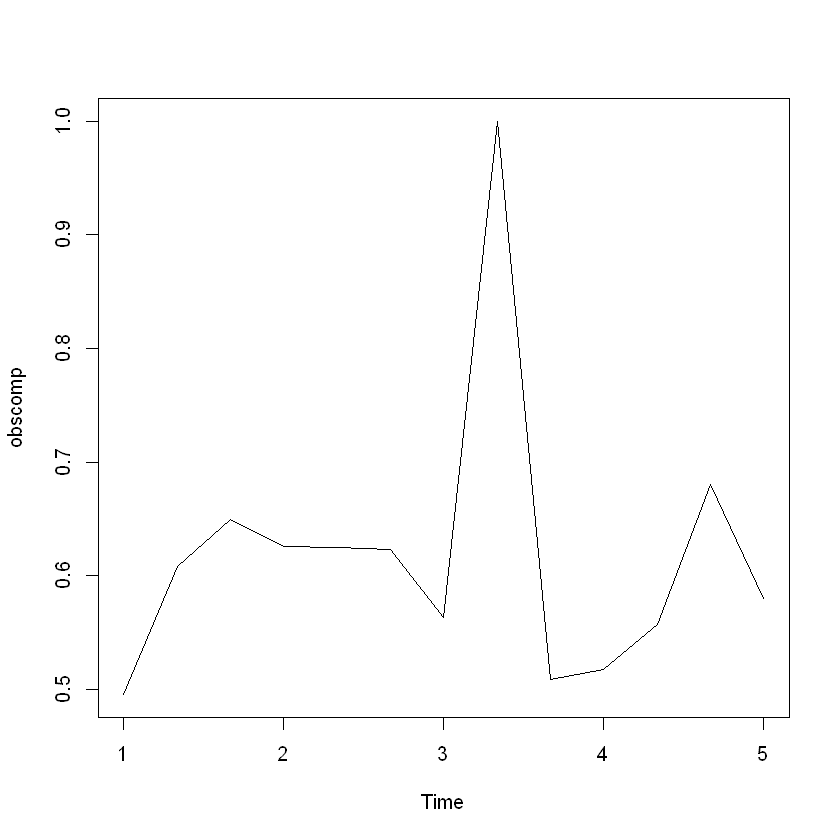

In [22]:
#Observed compensation plot
plot.ts(obscomp)

In [23]:
#Decompose observed salaries in statonary and tendency components. 
obscomp_Components <- decompose(obscomp)

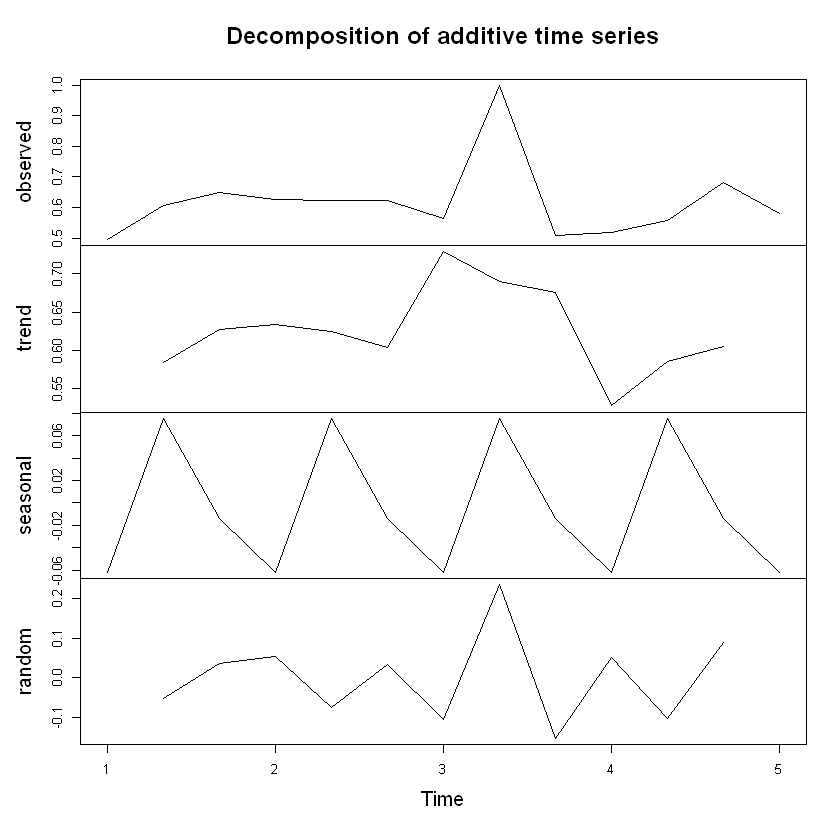

In [24]:
#Components plot
plot(obscomp_Components)